In [1]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Helper Functions

In [2]:
def plotter(na, nb, axis, mode, title='default', save=False, compare=False):
    """Useful in plotting things 2D orthographic projection of 3D scene.
    
    parameters
    ----------
        na: numpy.ndarray or Node
            Input data either parent (Node) or transformed point (numpy.ndarray).
        nb: numpy.ndarray or Node
            Input data either child (Node) or source point (numpy.ndarray).
        axis: str
            Gives the direction of rotational axis for euler orientation
        title: str
            The title of the figure.
        save: bool
            Enables saving of the figure
        compare:
            If enabled, takes in data as numpp.ndarray
    """
    fig = plt.figure(figsize=(5, 5), dpi=80)
    ax = fig.add_subplot(111)
    plt.xticks(None)
    plt.yticks(None)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.grid(visible=True)
    p_label = 'parent'
    if compare:
        data_b = nb
        data_a = na
        p_label = 'Transformed'
    else:
        data_b = nb.pos(mode)
        data_a = na.pos(mode)
    if axis == 'x':
        a_x, a_y = data_a[1: ]
        b_x, b_y = data_b[1: ]
        plt.xlabel('y-axis')
        plt.ylabel('z-axis')
    elif axis == 'z':
        print(data_a, data_b)
        a_x, a_y = data_a[:2]
        b_x, b_y = data_b[:2]
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
    if compare:
        plt.plot([b_x, 0], [b_y, 0], linestyle='-', marker='o', linewidth=1, label='Source')
    elif mode == 'world':
        plt.plot([a_x, b_x], [a_y, b_y], linestyle='-', marker='o', linewidth=1, label='child')
    elif mode == 'local':
        plt.plot([b_x, 0], [b_y, 0], linestyle='-', marker='o', linewidth=1, label='child')
    plt.plot([a_x, 0],  [a_y, 0], linestyle='-', marker='o', linewidth=1, label=p_label)
    ax.set_title(title)
    plt.legend()
    if(save):
        plt.savefig(f"imgs/{'_'.join(title.lower().split(' '))}.png")
    plt.show()

In [3]:
def print_rot(rotation):
    print("Rotation: ", rotation.as_euler('xyz') * 180.0 / np.pi)

In [4]:
class Node:
    def __init__(self, rotation, data, name, parent=None):
        self.rotation = rotation
        self.data = np.array(data)
        self.parent = parent
        self.name = f"Node: {name}"
        
    def rot(self, mode):
        if mode == "local":
            return self.rotation
        elif mode == "world" and self.parent is not None:
            return (self.parent.rotation * self.rotation)
        elif mode == "world":
            return self.rotation
        
    def pos(self, mode):
        if mode == "local":
            return self.rotation.apply(self.data)
        elif mode == "world" and self.parent is not None:
            rotation = self.parent.rotation * self.rotation
            position = self.parent.pos('world') + self.parent.rotation.apply(self.rotation.apply(self.data))
            return position
        elif mode == "world":
            return self.rotation.apply(self.data)
        
    def rotate(self, rotation, mode):
        result = rotation.apply(self.data)
        return result
        
    def log(self, show_local=False, show_world=False):
        print(f"\nStats for {self.name}")
        if self.parent is not None:
            print(f"Parent node is: {self.parent.name}")
        if show_local:
            print(f"Local position: {self.pos('local')}")
            print(f"Local rotation: {self.rot('local')}")
        if show_world:
            print(f"World position: {self.pos('world')}")
            print(f"World rotation: {self.rot('world')}")
            
    def plot_data(self, mode, rotation=True):
        return self.pos(mode)

# Setup

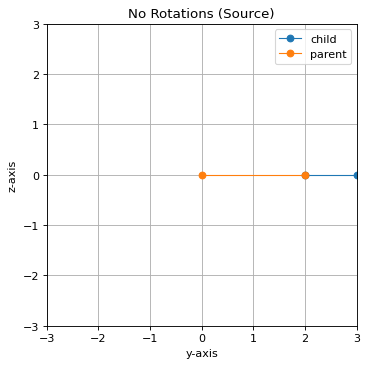

In [5]:
src_node_a = Node(R.from_euler('x', 0, degrees=True), [0.0, 2.0, 0.0], "Source - A")
src_node_b = Node(R.from_euler('x', 0, degrees=True), [0.0, 1.0, 0.0], "Source - B", src_node_a)
plotter(src_node_a, src_node_b, 'x', 'world', 'No Rotations (Source)', True)

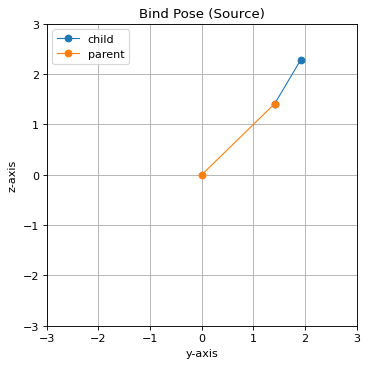

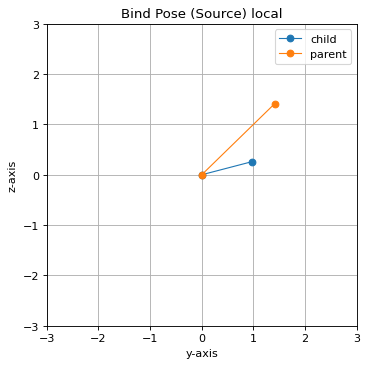

In [6]:
src_node_a = Node(R.from_euler('x', 45, degrees=True), [0.0, 2.0, 0.0], "Source - A")
src_node_b = Node(R.from_euler('x', 15, degrees=True), [0.0, 1.0, 0.0], "Source - B", src_node_a)

plotter(src_node_a, src_node_b, 'x', 'world', 'Bind Pose (Source)', True)
plotter(src_node_a, src_node_b, 'x', 'local',  'Bind Pose (Source) local')

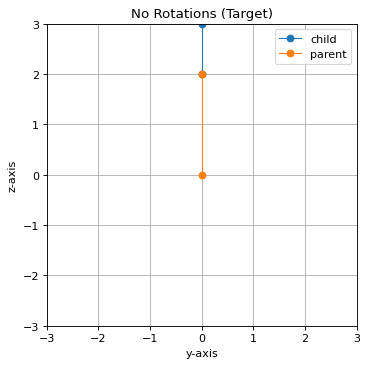

In [7]:
tar_node_a = Node(R.from_euler('x', 0, degrees=True), [0.0, 0.0, 2.0], "Target - A")
tar_node_b = Node(R.from_euler('x', 0, degrees=True), [0.0, 0.0, 1.0], "Target - B", tar_node_a)

plotter(tar_node_a, tar_node_b, 'x', 'world', 'No Rotations (Target)', True)

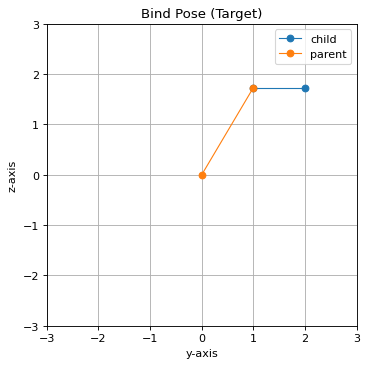

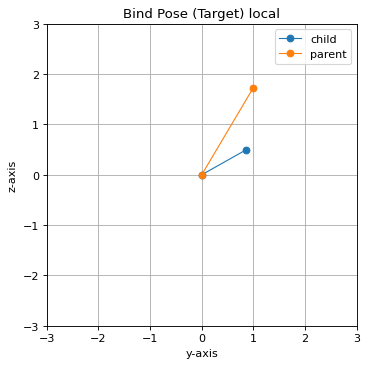

In [8]:
tar_node_a = Node(R.from_euler('x', -30, degrees=True), [0.0, 0.0, 2.0], "Target - A")
tar_node_b = Node(R.from_euler('x', -60, degrees=True), [0.0, 0.0, 1.0], "Target - B", tar_node_a)

plotter(tar_node_a, tar_node_b, 'x', 'world', 'Bind Pose (Target)', True)
plotter(tar_node_a, tar_node_b, 'x', 'local',  'Bind Pose (Target) local')

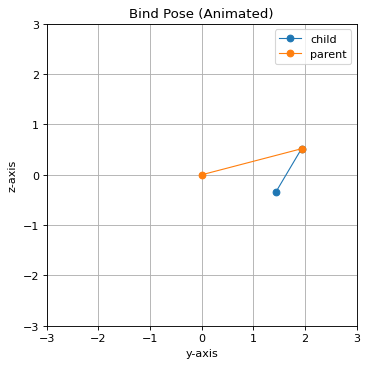

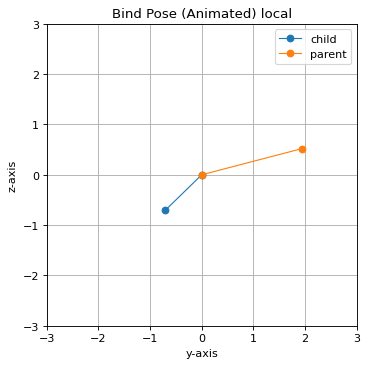

In [9]:
# Animate src bones
animated_src_a = Node(R.from_euler('x', 15, degrees=True), [0.0, 2.0, 0.0], "Target - A")
animated_src_b = Node(R.from_euler('x', 225, degrees=True), [0.0, 1.0, 0.0], "Target - B", animated_src_a)

plotter(animated_src_a, animated_src_b, 'x', 'world', 'Bind Pose (Animated)', True)
plotter(animated_src_a, animated_src_b, 'x', 'local',  'Bind Pose (Animated) local')

# Calculate the difference

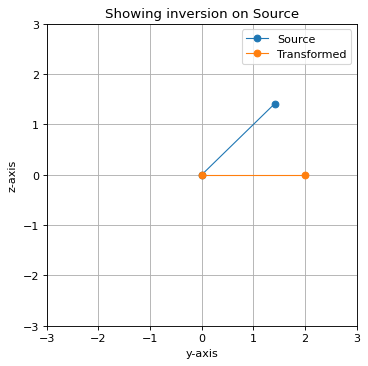

In [10]:
inverted = R.inv(src_node_a.rot('world')).apply(src_node_a.pos('world'))
plotter(inverted, src_node_a.pos('world'), 'x', 'world', title='Showing inversion on Source', compare=True, save=True)

In [11]:
# Find the difference! Here src_node_a is a root node. Therefore local rotation == world rotation as a result 
tar_src_diff = R.inv(src_node_a.rot('world')) * tar_node_a.rot('world')
print_rot(tar_src_diff)

Rotation:  [-75.   0.   0.]


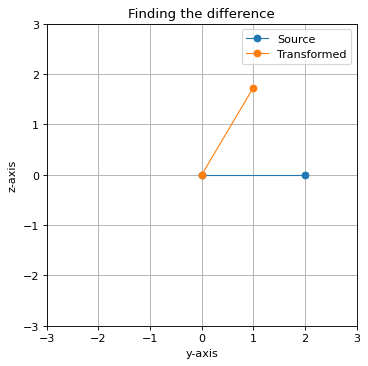

In [12]:
plotter(tar_node_a.pos('world'), inverted, 'x', 'world', title='Finding the difference', compare=True, save=True)

# Estimation of Animated Pose

Rotation:  [60.  0.  0.]
Rotation:  [-90.   0.   0.]


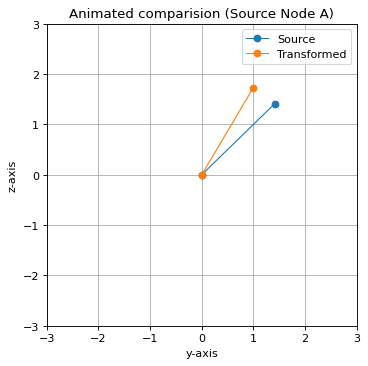

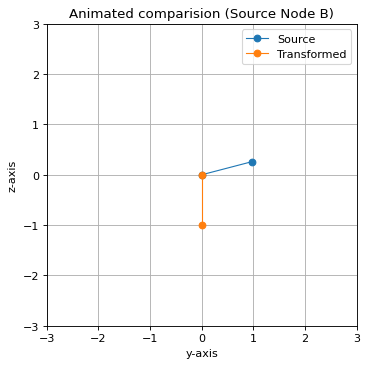

In [13]:
animated_world_rotation_a = (src_node_a.rot('world')) * animated_src_a.rot('local') 
animated_world_rotation_b = (src_node_a.rot('world')) * animated_src_b.rot('local')
print_rot(animated_world_rotation_a)
print_rot(animated_world_rotation_b)

plotter(animated_world_rotation_a.apply([0, 2, 0]), src_node_a.pos('world'),
        'x', mode='world', title='Animated comparision (Source Node A)', save=True, compare=True)

plotter(animated_world_rotation_b.apply([0, 1, 0]), src_node_b.pos('local'),
        'x', mode='world', title='Animated comparision (Source Node B)', save=True, compare=True)


# Apply rotation to the animated pose

In [14]:
dot_a = np.dot(animated_world_rotation_a.as_quat(), src_node_a.rot('world').as_quat())
print("Dot product between animated rotation and source rotation (Node A): ", dot_a)

dot_b = np.dot(animated_world_rotation_b.as_quat(), src_node_a.rot('world').as_quat())
print("Dot product between animated rotation and source rotation (Node B): ", dot_b)


Dot product between animated rotation and source rotation (Node A):  0.9914448613738105
Dot product between animated rotation and source rotation (Node B):  -0.3826834323650898


In [15]:
updated_anim_rot_a = animated_world_rotation_a * tar_src_diff
if dot_a < 0:
    updated_anim_rot_a = animated_world_rotation_a * R.from_quat((-tar_src_diff.as_quat()))
    
updated_anim_rot_b = animated_world_rotation_b * tar_src_diff
if dot_b < 0:
    updated_anim_rot_b = animated_world_rotation_b * R.from_quat((-tar_src_diff.as_quat()))
    
print_rot(updated_anim_rot_a)
print_rot(updated_anim_rot_b)

# The extra rotation that needs to be added to the our target animated node. To match the animation style!!!

Rotation:  [-15.   0.   0.]
Rotation:  [-165.    0.    0.]


# Finally applying animation on the target.

In [16]:
animated_target_a = tar_node_a
animated_target_b = tar_node_b

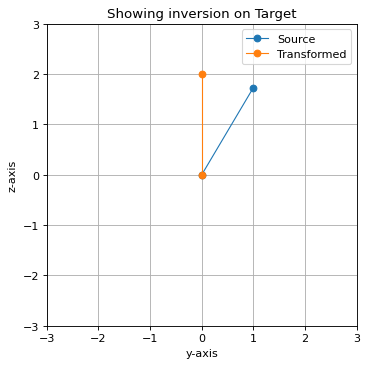

In [17]:
# Perform the inverse of this rotation!
inverted_tar_parent_world_rotation = R.inv(tar_node_a.rot('world')) # Get the inverted rotation!
inverted = inverted_tar_parent_world_rotation.apply(tar_node_a.pos('world'))
plotter(inverted, tar_node_a.pos('world'), 'x', 'world', title='Showing inversion on Target', compare=True, save=True)

In [19]:
animated_target_a.rotation = inverted_tar_parent_world_rotation * updated_anim_rot_a
animated_target_b.rotation = inverted_tar_parent_world_rotation * updated_anim_rot_b

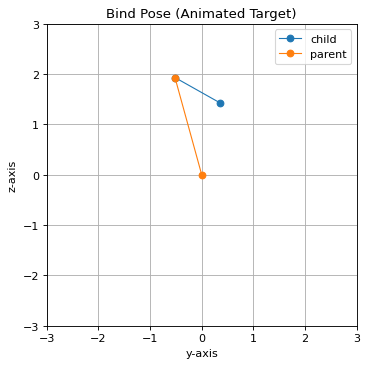

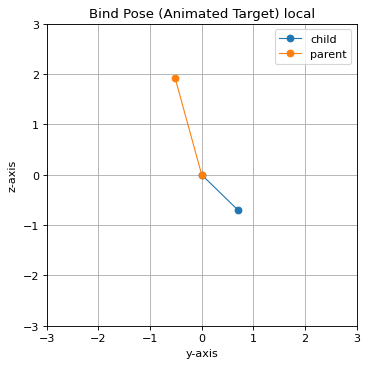

In [20]:
plotter(animated_target_a, animated_target_b, 'x', 'world', 'Bind Pose (Animated Target)', True)
plotter(animated_target_a, animated_target_b, 'x', 'local',  'Bind Pose (Animated Target) local')